<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

# Overview

The objective of this notebook is to demonstrate to a relatively novice python data scientist how easy it is to perform complex data analysis on market data.

The piece of analysis that will be performed is:

1.	Correlate the daily returns of PXD stock against the daily returns of a small basket of securities (SPY, Gold, Natural Gas and Oil)
2.	Perform a regression analysis of PXD against the basket
3.	Extend this to perform a regression analysis of an arbitrary security against the same basket
4.	Export the data to an excel spreadsheet.

This analysis will touch on the following data science topics:
- The pandas, numpy and matplotlib python packages
- Importing data from csv files into a pandas DataFrame
- The rows, columns and index of a DataFrame
- Accessing data from a DataFrame along its rows and columns
- Slicing Data
- Time Series
- Merging multiple DataFames into a single larger DataFrame
- Exporting DataFames into an Excel spreadsheet


Users will see how to execute the following operations:
1.	Calculate the daily returns of a security
2.	Correlate the daily returns of securities
3.	Perform a linear regression analysis of data securities


## Import the libraries

To perform almost anything useful in a python program, the user/programmer/data scientist will need to use a pre-written bundle of python code, known as a python package.

Users must `import` these packages into their python program.

Importing packages into a python program is analogous to extending any piece of software by adding addons/apps to it. 

e.g.
- using an  Excel Add-in
- adding extensions to a chrome browser


The most commonly used python packages are `pandas`, `numpy` and `matplotlib`, although there are literally hundreds of other packages in everyday use.

**Aliases**<br>
It is often the case that users will give a package an alias when it is imported. Users can decide on the names of any aliases they use, but the conventional aliases for the packages we will use are given below.

**Magics**<br>
The line %matploblib inline is a `python magic`.
This magic forces the notebook to embed any graphs produced by matplotlib into this current notebook, rather than in a separate window.

In [32]:
# Load in libraries - pandas, numpy, matplotlib are commonly used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data into a DataFrame

Here I am using `pandas.read_excel(...)` to read in an excel spreadhseet into a pandas DataFrame called df_Basket

`io`
> the file being read in
    
`index_col`
> the column of the csv file we want to use as the index of our DataFrame

`parse_dates`
> instruct the read_csv function to convert anything that looks like a date into a python date

`sheet_name`
> the name of the work sheet in the spreadsheet containing the data

In [33]:
# Load in df_Basket
df_Basket = pd.read_excel('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/regression.xlsx',
                          index_col='Date',
                          sheet_name='Basket')

## Examine the Data

Usually users will quickly inspect the data they have loaded in, to make sure they have imported it correctly. Inspecting the data is also extremely useful to get a mental image of the size and shape of the data that has been loaded in.

Here are some of the most common operations 

In [34]:
# try using the info() method
df_Basket.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 644 entries, 2017-01-03 to 2019-08-19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     644 non-null    float64
 1   Oil     644 non-null    float64
 2   Gold    644 non-null    float64
 3   NG      644 non-null    float64
dtypes: float64(4)
memory usage: 25.2 KB


In [35]:
# Enter Some functions to get the size and shape if the data here
display(df_Basket.size)
display(df_Basket.shape)

2576

(644, 4)

In [36]:

# Try using describe() to get info about the data
df_Basket.describe()

,SPY,Oil,Gold,NG
count,644.000000,644.000000,644.000000,644.000000
mean,259.270058,57.802019,1280.998292,2.964876
std,22.462847,8.116477,59.849990,0.461331
min,214.830276,42.480000,1148.650000,2.020000
25%,238.136368,51.420000,1237.462500,2.740000
50%,262.769989,56.780000,1279.950000,2.910000
75%,276.659904,64.317500,1313.437500,3.092500
max,302.010010,77.410000,1527.200000,6.240000


## Correlation

A pandas DataFrame has a `corr()` function that will produce a new DataFrame containing the correlation matrix.

The correlation of prices for the basket DataFrame is:

In [37]:
# Correlate the basket here with the corr() method on a DataFrame
df_CORR = df_Basket.corr()
df_CORR

,SPY,Oil,Gold,NG
SPY,1.000000,0.627966,0.411833,-0.225613
Oil,0.627966,1.000000,-0.024960,-0.073013
Gold,0.411833,-0.024960,1.000000,-0.441181
NG,-0.225613,-0.073013,-0.441181,1.000000


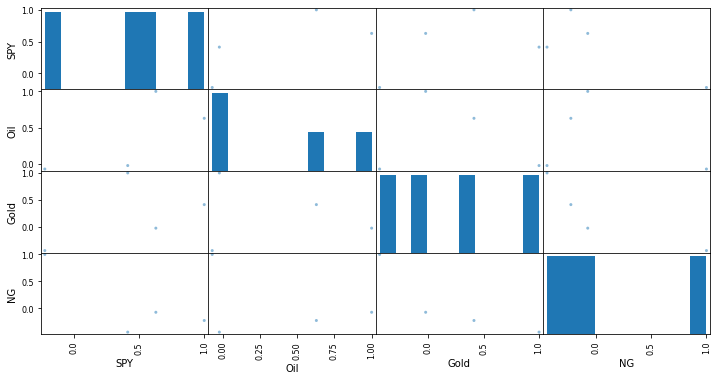

In [38]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(df_CORR, figsize=(12,6))

## Correlating PXD against the basket

This is easy to achieve also

- Read the PXD data into a DataFrame.
- Calculate the percentage change for this data.
- Concatenate this DataFrame to the basket and then produce a single correlation.

As expected, the correlation between PXD performance and SPY is much stronger than with IBM and regular commodities

In [50]:
# Load in the PXD data
df_PXD = pd.read_excel('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/regression.xlsx',
                       index_col='Date',
                       sheet_name = 'PXD')
df_PXD

,PXD
Date,
2017-01-03,185.759918
2017-01-04,183.340866
2017-01-05,184.863968
2017-01-06,184.236816
2017-01-09,181.777924
...,...
2019-08-19,128.220001
2019-08-20,126.599999
2019-08-21,126.940002


In [44]:
# Calculate its returns with pct_change()
# Concatenate the PXD returns to the Basket returns
# Display the correlation between PXD and the Basket
#df = pd.DataFrame()
#df['ReturnsPXD'] = df_PXD['PXD'].pct_change()
df_returns_PXD = df_PXD['PXD'].pct_change()

In [45]:
#df['ReturnsSPY'] = df_Basket['SPY'].pct_change()
#df['ReturnsOil'] = df_Basket['Oil'].pct_change()
#df['ReturnsGold'] = df_Basket['Gold'].pct_change()
#df['ReturnsNG'] = df_Basket['NG'].pct_change()
df_Returns_Basket = df_Basket.pct_change()
df_returns = pd.concat([df_returns_PXD,df_Returns_Basket],axis=1)

In [46]:
df_returns.corr()

,PXD,SPY,Oil,Gold,NG
PXD,1.000000,0.463130,0.494833,0.031324,0.018200
SPY,0.463130,1.000000,0.217715,0.013797,0.008208
Oil,0.494833,0.217715,1.000000,0.069057,0.023245
Gold,0.031324,0.013797,0.069057,1.000000,-0.043264
NG,0.018200,0.008208,0.023245,-0.043264,1.000000


## Regression Analysis

Regression is an econometric method that allows a user to attempt to see what variables drive another variable.  Regression analysis calculates a number of important values

**Beta, Significance & P-Values**

A **beta** is what a 1-unit increase in the specific variable does to the dependent variable.
For example a .5 beta means that if a variable is increased by 1, the dependent variable would be expected to go up by 0.5. 

**Significance** measures the probability that a particular variable's value was a random occurrence.
For example, a significance factor of 0.05 means there was a 5% chance that this was a random event, 0.01 means a 1% chance, and so on. 

A **p-value** is used to provide the smallest level of significance at which the null hypothesis would be rejected.

Beta, Significance and p-values are important because they are indicators to users about what is significant.

For example, we might expect that gold prices effect all stocks. However, when we control for the market (by using SPY) we notice that the reason gold is correlated with all these stocks is because it is also correlated with the market! This gives us better precision since we see which firms really get effected by gold versus which just get effected by the overall market environment.

A very accurate regression analysis is performed using the statsmodels OLS function (ordinary least squares). The formula parameter sets the dependent variable and the matrix of factors. <br><br>
> `PXD` **~** `SPY + Oil + Gold + NG`<br>

In the above expression<br>
> `PXD` is the dependent variable <br>
> `SPY + Oil + Gold + NG` are the set of features in the model.


https://www.statsmodels.org/stable/index.html

In [52]:
# Create a regression model with statsmodels
# use statsmodels.formula.api (alias as sm)
# statsmodels documentation is useful, we can use the formula:
# "PXD ~ SPY + Oil + Gold + NG"
# fit the model
# Prouduce the regression report

import statsmodels.formula.api as sm
model = sm.ols(formula="PXD ~ SPY + Oil + Gold + NG",data=df_returns)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PXD   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     96.72
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           2.62e-64
Time:                        09:25:30   Log-Likelihood:                 1750.8
No. Observations:                 643   AIC:                            -3492.
Df Residuals:                     638   BIC:                            -3469.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0010      0.001     -1.631      0.103      -0.002       0.000
SPY            0.9278      0.080     11.657      0.000       0.772       1.084
Oil            0.4450      0.035     12.891      0.000       0.377       0.513
Gold          -0.0063      0.092     -0.069      0.945      -0.186       0.174
NG             0.0021      0.012      0.174      0.862      -0.021       0.025
==============================================================================
Omnibus:                      109.108   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1521.695
Skew:                           0.203   Prob(JB):                         0.00
Kurtosis:                      10.525   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can plot the price of PXD predicted by the model against the actual prices to get a sense of the model's accuracy

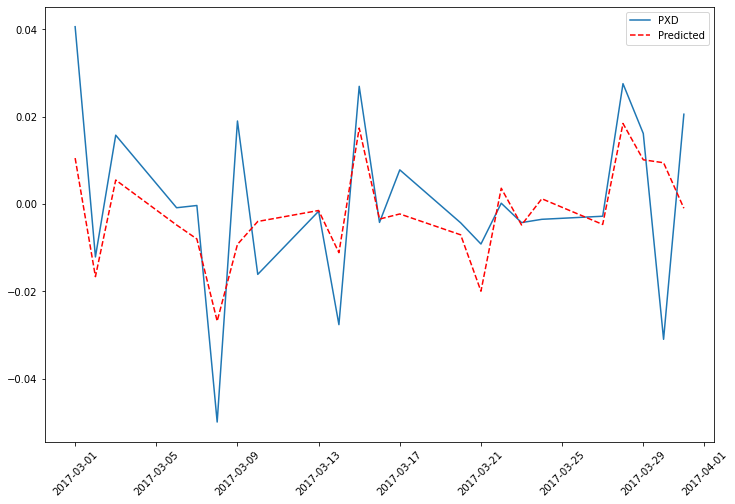

In [53]:
%matplotlib inline

# choose a date range so we can see more clearly what's happening
date_range = "March 2017"

fig, ax = plt.subplots(figsize=(12, 8))

# plot the return for PXD and the model's prediction on the same axes for the date range
ax.plot(df_returns.loc[date_range, 'PXD'], label="PXD")
ax.plot(result.fittedvalues.loc[date_range], "r--", label="Predicted")


legend = ax.legend(loc="best")
plt.xticks(rotation=45)

plt.show()

**Note the following**<br>
1) 2 factors have a p-value  (**P>|t|**) < 0.05 : SPY and Oil<br>
Given that PXD is an oil exploration company, it's daily returns follow very closely the returns of both the SP500 index and the price of Oil.

2) The PXD beta for stock market returns is relatively high at 0.77, and Oil has a beta of 0.27. This means that for every 1% change in the price of oil, users can expect a 0.27% change in the price of the PXD stock. 

3) Another way of thinking of this is 
> PXD = `(0.772 X SPY) + (0.269 X Oil) + (0.046 X Gold) + (0.045 X NG)`

We can turn then above statements into a function.

In [ ]:
# Create a regress function here that takes a ticker
# and a DataFrame of the basket
# The function should return a trained ols model
def regress(stock, df):
  fomula = "~ SPY + Oil + Gold + NG"
  return sm.ols(fomula = stock+fomula,data=df).fit()

## Extract Data from the report

Use the `regress()` function to
- display the report
- display only the p-values
- display only the p-values less than 0.05

And most importantly, use the params attribute of the OLS report to display the `features` less than 0.05



In [ ]:
# run the report
# product the summary
# display all p-values
# display all p-values < 0.05
# display the `features` less than 0.05


## Re-write the function

To display only those factors with a p-value less than some arbirtrary value

In [ ]:
# Re-Factor the regress function, include a pval and return a filtered DataFrame
# Execute the function
# Display the report


# Exercise

## Perform this analysis for any abritrary stock

Rather than importing a single stock data, we can easily import all stock data for all companies in the SP500 index. 
We will follow the same “pattern”:
- Load a DataFrame that represents the basket.
- Load a DataFrame of all SP500 stocks.
- Calculate the daily returns and concatenate both DataFrames.
- Calculate the Betas for ALL stocks when regressions are performed against the basket.
- Save the results to a Spreadsheet.

The first 3 steps are:

In [ ]:
# Load in df_Basket
df_Basket = pd.read_excel('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/regression.xlsx',
                          parse_dates=True,
                          index_col='Date',
                          sheet_name = 'Basket')

# Load in the Stock Prices
df_Stocks = pd.read_excel('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/regression.xlsx',
                          parse_dates=True,
                          index_col='Date',
                           sheet_name = 'StockPrices')

In [ ]:
# Caluclate the daily returns for the Basket and for the Stocks
# Concatenate both DataFrames


## Calculate Betas for ALL stocks with p-value < 0.05


A very simple loop achieves this.<br>

**Note**<br>
1) the slice `f_returns.columns[:-4]` returns all BUT the last 4 columns as the last 4 columns are our basket.

2) We are progressively concatenating the results of the regression into a single DataFrame containing all of the results.


In [ ]:
# Create an empy dataframe
# Loop over every returns (skip the last 4 columns) and calculate the betas from a regression 
# Dislpay the shape


## Export the DataFrame to a Spreadsheet


In [ ]:
# Create a writer
# Convert the DataFrame to an XlsxWriter Excel object.
# In this case we'll put each of the FANG columns in a separate sheet.
# Close the Pandas Excel writer and output the Excel file.
